In [21]:
# Mount your google drive
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [2]:
# System setup Emma

# Change working directory to project folder
os.chdir('/Users/emmamorlock/git/GitHub/Earth-System-Modelling')

# Append project to path for easy imports
sys.path.append('/Users/emmamorlock/git/GitHub/Earth-System-Modelling')

In [36]:
# System setup Lennart, Lars

# Change working directory to project folder
#os.chdir('/content/drive/MyDrive/Earth-System-Modelling/ESM-sharefolder')

# Append project to path for easy imports
#sys.path.append('/content/drive/MyDrive/Earth-System-Modelling/ESM-sharefolder')

In [2]:
# Import the model
# The model is stored in another file
# all functions are definded there...
from swbm_mini_ice import prepro, predict_ts, model_correlation

# Now you have access to the functions:
# prepro() predict_ts() model_correlation()

# Read the data https://raw.githubusercontent.com/emorl/Earth-System-Modelling/main/data/Data_swbm_Germany_new.csv

data_DE = pd.read_csv("https://raw.githubusercontent.com/emorl/Earth-System-Modelling/main/data/Data_swbm_Germany_new.csv")
data_ES = pd.read_csv()
data_SWE = pd.read_csv("https://github.com/emorl/Earth-System-Modelling/blob/main/data/Data_swbm_Spain_new.csv")

# Prepare the data
data_prepro_DE = prepro(data_DE)
data_prepro_ES = prepro(data_ES)
data_prepro_SWE = prepro(data_SWE)

ParserError: Error tokenizing data. C error: Expected 1 fields in line 38, saw 2


In [4]:
# Define initial parameters
config = {
    'c_s': 420,    # soil water holding capacity in mm, cs = 210mm, 420mm, 840mm
    'a': 4,        # runoff function shape α, α = 2,4,8
    'g': 0.5,      # ET function shape γ, γ = 0.2, 0.5, 0.8
    'b0': 0.8,     # maximum of ET function β, β = 0.4, 0.6, 0.8
    'i_max': 20     # max infiltrationsrate zwischen 20 mm/day und unendlich
}


In [ ]:
# Run the SWBM model
#data_prepro = data_prepro_SWE
#moisture, runoff, et_flux = predict_ts(data_prepro, config)

In [6]:
# Run the SWBM model (Lars experiment)
data_prepro = data_prepro_SWE
#moisture, runoff, et_flux, runoff_s, runoff_h = predict_ts(data_prepro, config)
moisture, runoff, et_flux, runoff_s, runoff_h = predict_ts(data_prepro, config)

ValueError: not enough values to unpack (expected 6, got 5)

In [ ]:
moisture, runoff, et_flux, runoff_s, runoff_h, runoff_ice = predict_ts(data_prepro, config)

268.22633426707165
5902.139029199997


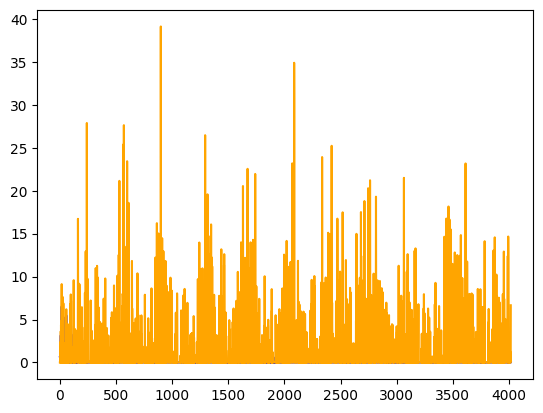

In [ ]:
print(sum(runoff_s))
print(sum(runoff_h))
plt.plot(runoff_s, color='blue')
plt.plot(runoff_h, color='orange')
plt.show()

4600.5510715172495
4600.5510715172495


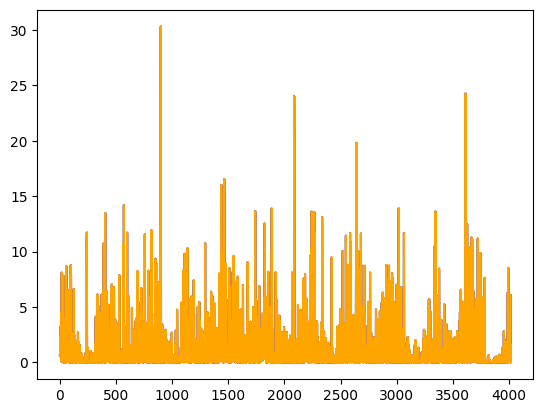

In [ ]:
print(sum(runoff_h + runoff_s))
print(sum(runoff))
plt.plot(runoff_h + runoff_s, color='blue')
plt.plot(runoff, color='orange')
plt.show()

In [ ]:
# Compute correlation over the whole timeseries
corrs = model_correlation(data_prepro, (moisture, runoff, et_flux))
print("Correlation between observed data and model outputs:\n")
print(f"Soil Moisture (sm):      {corrs['sm']:.3f}")
print(f"Runoff (ro):             {corrs['ro']:.3f}")
print(f"Evapotranspiration (et): {corrs['et']:.3f}")
print(f"\nSum of correlations:   {corrs['sum']:.3f}")

Correlation between observed data and model outputs:

Soil Moisture (sm):      -0.138
Runoff (ro):             0.067
Evapotranspiration (et): 0.806

Sum of correlations:   0.736


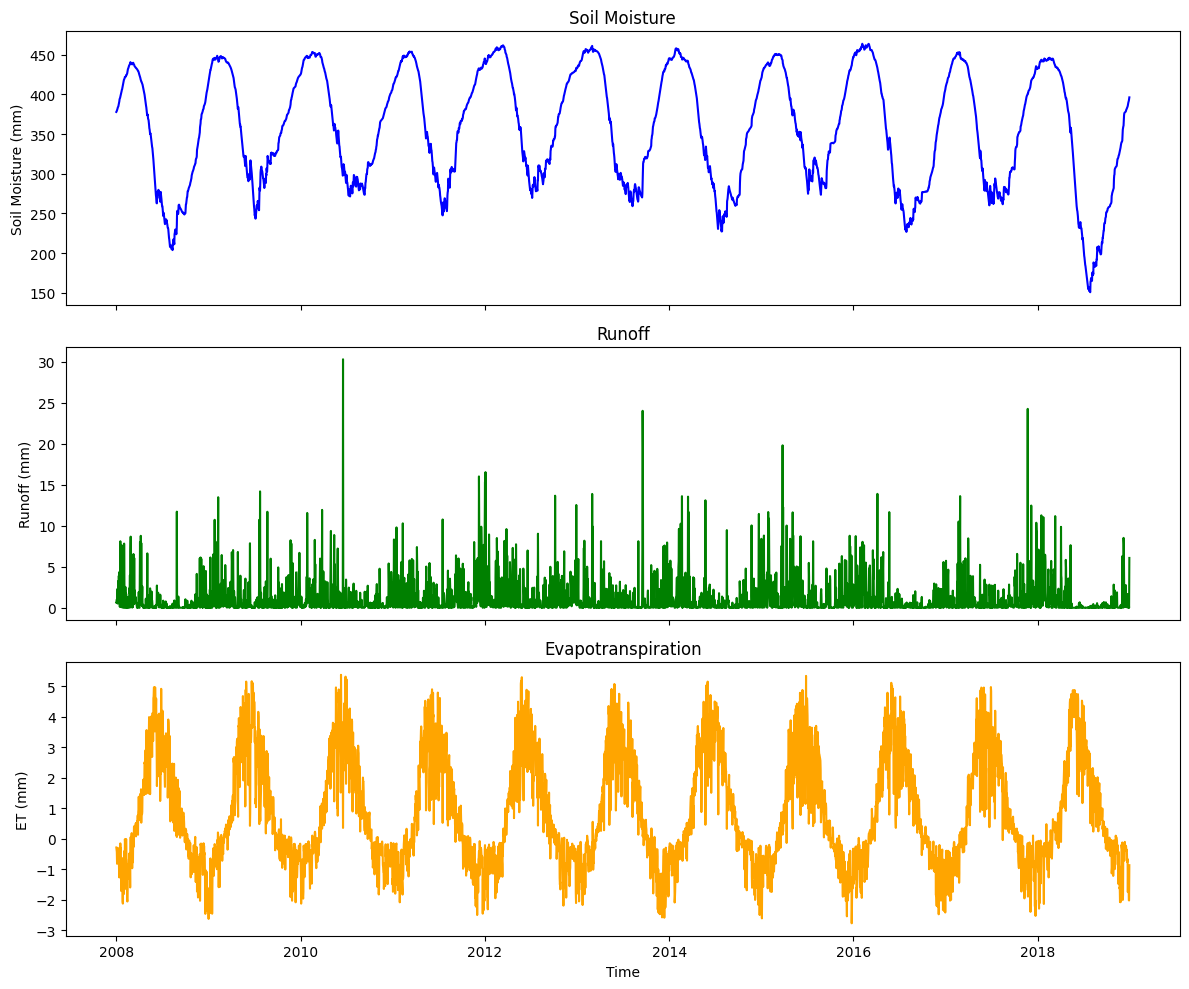

In [ ]:
# Plot the results
fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# Soil moisture
axes[0].plot(data_prepro['time'], moisture, color='blue')
axes[0].set_ylabel('Soil Moisture (mm)')
axes[0].set_title('Soil Moisture')

# Runoff
axes[1].plot(data_prepro['time'], runoff, color='green')
axes[1].set_ylabel('Runoff (mm)')
axes[1].set_title('Runoff')

# Evapotranspiration
axes[2].plot(data_prepro['time'], et_flux, color='orange')
axes[2].set_ylabel('ET (mm)')
axes[2].set_title('Evapotranspiration')
axes[2].set_xlabel('Time')

plt.tight_layout()
plt.show()

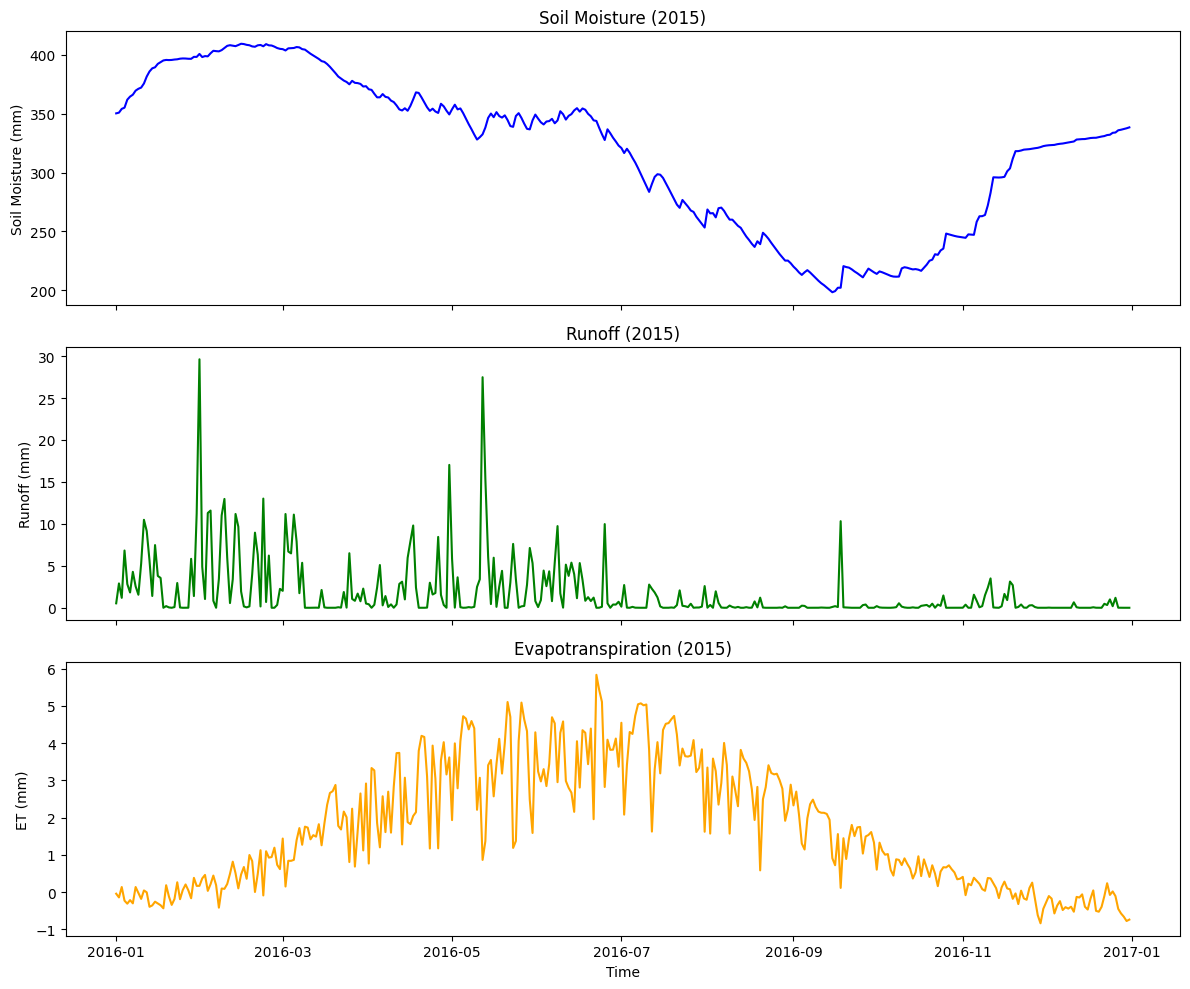

In [ ]:
# Plot only one year
one_year = data_prepro[(data_prepro['time'] >= "2016-01-01") & (data_prepro['time'] <= "2016-12-31")]
moisture_year = moisture[one_year.index]
runoff_year = runoff[one_year.index]
et_flux_year = et_flux[one_year.index]
fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)
# Soil moisture
axes[0].plot(one_year['time'], moisture_year, color='blue')
axes[0].set_ylabel('Soil Moisture (mm)')
axes[0].set_title('Soil Moisture (2015)')
# Runoff
axes[1].plot(one_year['time'], runoff_year, color='green')
axes[1].set_ylabel('Runoff (mm)')
axes[1].set_title('Runoff (2015)')
# Evapotranspiration
axes[2].plot(one_year['time'], et_flux_year, color='orange')
axes[2].set_ylabel('ET (mm)')
axes[2].set_title('Evapotranspiration (2015)')
axes[2].set_xlabel('Time')
plt.tight_layout()
plt.show()